In [1]:
 import sys
sys.path.insert(0, '../../../network')
sys.path.insert(0, '../../../figures')
from sequences import GaussianSequence
from transfer_functions import ErrorFunction
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from learning import ReachingTask

In [2]:
# Set font family globally
sns.set_style('white') 
colors = sns.color_palette('deep')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rcParams['axes.linewidth'] = 0.1

### Filename and Directory

In [51]:
filename = 'learning-env-300-0.03-100-0.9-1-1'
path = '/work/jp464/striatum-sequence/' + filename + '.npz'
data = np.load(path) 
overlaps_ctx = data['overlaps_ctx']
overlaps_d1 = data['overlaps_d1']
# values = data['values']
# rpes = data['rpes']
# correlations_ctx = data['correlations_ctx']
# correlations_bg = data['correlations_bg']
# state_ctx = data['state_ctx']
# state_d1 = data['state_d1']

### Overlap vs Time

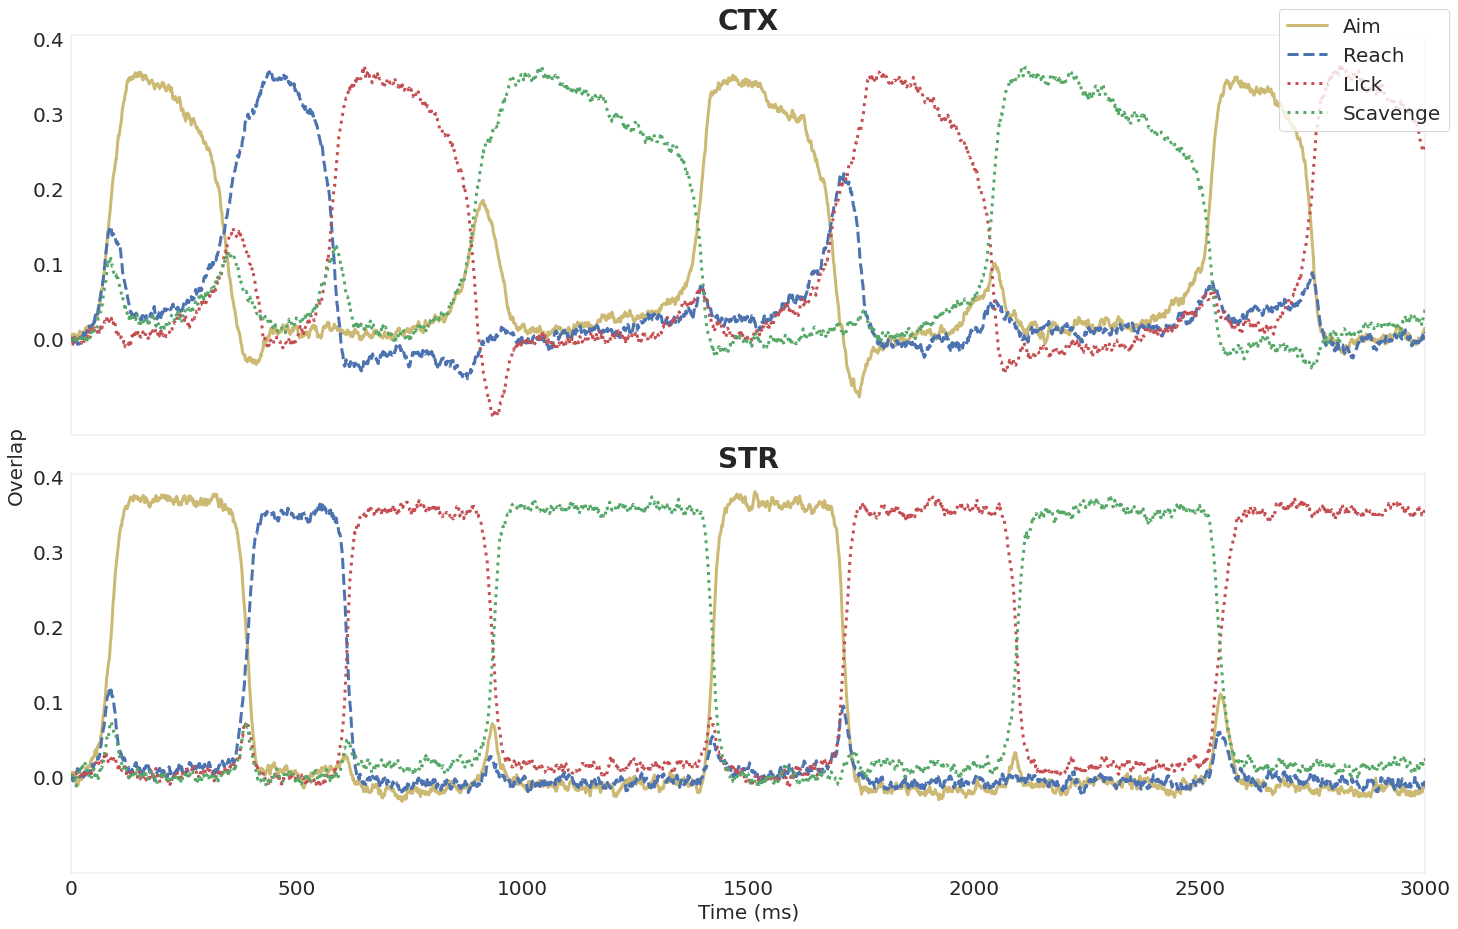

In [52]:
### Overlap 
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8])
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[0].plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=28, weight='bold')
axes[1].plot(overlaps_d1[0], linestyle='solid', linewidth=3, color=colors[8])
axes[1].plot(overlaps_d1[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[1].plot(overlaps_d1[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[1].plot(overlaps_d1[3], linestyle='dotted', linewidth=3, color=colors[2])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("STR", fontsize=28, weight='bold')
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 3000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick', 'Scavenge'], fontsize=20)
# plt.savefig('/work/jp464/striatum-sequence/output/constant-env-pathological.jpg', bbox_inches = "tight", format='jpg')
plt.show()



### Raster Plot

### Learning rate

### Value 

<ipython-input-18-d91072a128bd>:34: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(ticksx, column_names)
<ipython-input-18-d91072a128bd>:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(ticksx, column_names)
<ipython-input-18-d91072a128bd>:44: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax3.set_xticks(ticksx, column_names)
<ipython-input-18-d91072a128bd>:50: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor release

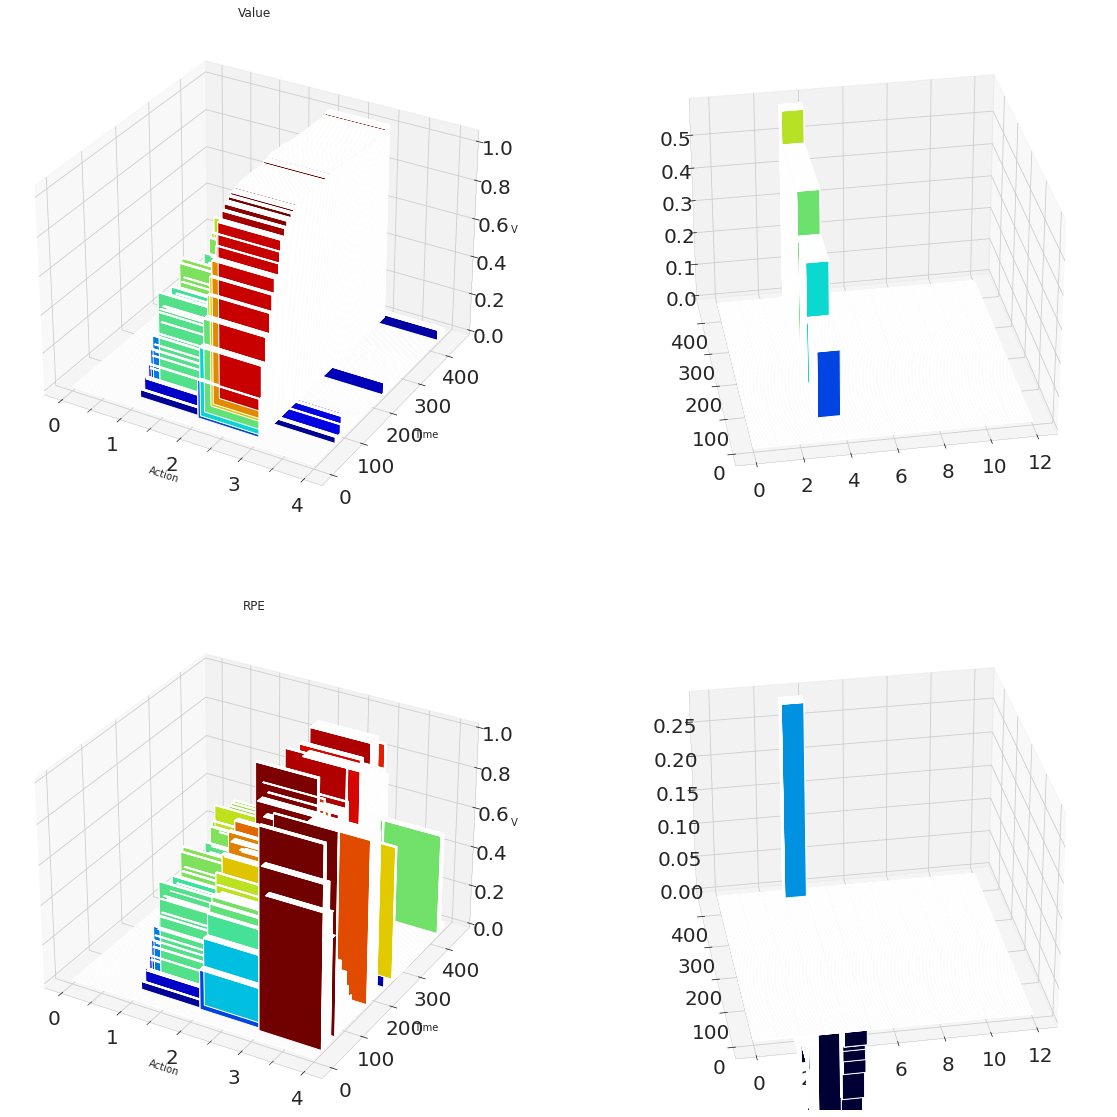

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def create_grid(len_x, len_y):
    _x, _y = np.arange(len_x), np.arange(len_y)
    _xx, _yy = np.meshgrid(_x, _y)
    return _xx.ravel(), _yy.ravel()

def plot_3d_bar(V, idxs):
    x, y = create_grid(len(idxs), V.shape[1])
    top = V[idxs,:].reshape(-1, order='F')
    bottom = np.zeros_like(top)
    width = depth = 1
    cmap = cm.get_cmap('jet')
    max_height = 1 
    min_height = 0
    rgba = [cmap((k-min_height)/max_height) for k in top] 
    
    return x, y, bottom, width, depth, top, rgba

x0, y0, b0, w0, d0, t0, color0 = plot_3d_bar(values, [3,4,9,10])
x1, y1, b1, w1, d1, t1, color1 = plot_3d_bar(values, [i for i in range(16) if i not in [3,4,9,10]])
x2, y2, b2, w2, d2, t2, color2 = plot_3d_bar(rpes, [3,4,9,10])
x3, y3, b3, w3, d3, t3, color3 = plot_3d_bar(rpes, [i for i in range(16) if i not in [3,4,9,10]])

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
column_names = ['scavenge', 'aim', 'reach', 'lick']
ticksx = np.array([0.5, 1.5, 2.5, 3.5])
ax1.set_xticks(ticksx, column_names)
ax1.bar3d(x0, y0, b0, w0, d0, t0, shade=True, color=color0)
ax1.set_title('Value')
ax1.set_xlabel('Action')
ax1.set_ylabel('Time')
ax1.set_zlabel('V')
ax1.set_xticks(ticksx, column_names)
ax1.view_init(30, -60)
ax2.bar3d(x1, y1, b1, w1, d1, t1, shade=True, color=color1)
ax2.view_init(30, -100)
ax3.set_xticks(ticksx, column_names)
ax3.bar3d(x2, y2, b2, w2, d2, t2, shade=True, color=color2)
ax3.set_title('RPE')
ax3.set_xlabel('Action')
ax3.set_ylabel('Time')
ax3.set_zlabel('V')
ax3.set_xticks(ticksx, column_names)
ax3.view_init(30, -60)
ax4.bar3d(x3, y3, b3, w3, d3, t3, shade=True, color=color3)
ax4.view_init(30, -100)
plt.savefig('/work/jp464/striatum-sequence/output/simulation-RPE2-2.jpg', bbox_inches = "tight", format='jpg')
plt.show()

In [21]:
[i for i in range(16) if i not in [3,4,9,10]]

[0, 1, 2, 5, 6, 7, 8, 11, 12, 13, 14, 15]